In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

path=r"C:\Users\deepa\Downloads\data_science_job.csv"

In [2]:
d=pd.read_csv(path)

In [3]:
d.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [6]:
d.isna().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [10]:
cols=[]
for col in d.columns:
    if d[col].isna().mean()*100>0 and d[col].isna().mean()*100<5:
        cols.append(col)

cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [20]:
d[cols].sample(2)

,city_development_index,enrolled_university,education_level,experience,training_hours
14252,0.884,no_enrollment,Masters,8.0,165.0
17180,0.920,Part time course,Graduate,0.0,112.0


In [31]:
# here i have done Complete Case analysis means i have removed these columns which are having at least one NaN value
df=d[cols].dropna()

In [32]:
df

,city_development_index,enrolled_university,education_level,experience,training_hours
0,0.920,no_enrollment,Graduate,20.0,36.0
1,0.776,no_enrollment,Graduate,15.0,47.0
2,0.624,Full time course,Graduate,5.0,83.0
4,0.767,no_enrollment,Masters,20.0,8.0
5,0.764,Part time course,Graduate,11.0,24.0
...,...,...,...,...,...
19153,0.878,no_enrollment,Graduate,14.0,42.0
19154,0.920,no_enrollment,Graduate,14.0,52.0
19155,0.920,no_enrollment,Graduate,20.0,44.0
19156,0.802,no_enrollment,High School,0.0,97.0


In [33]:
df.shape

(17182, 5)

In [34]:
len(df)/len(d)

0.8968577095730244

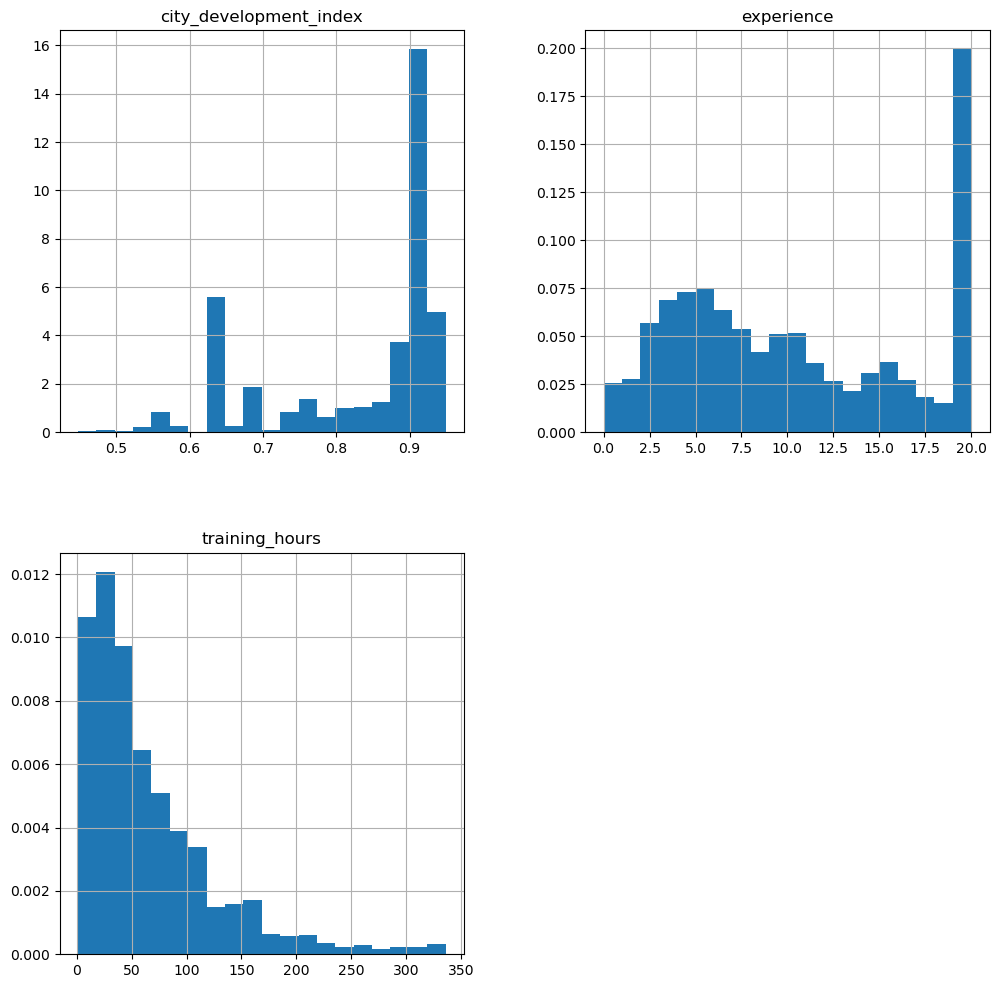

In [43]:
df.hist(bins=20,density=True,figsize=(12,12))
plt.show()

<Axes: >

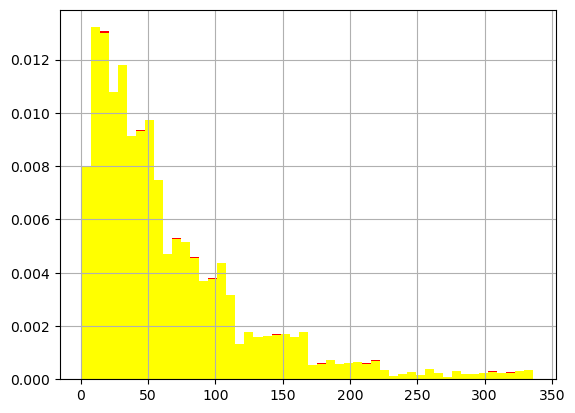

In [50]:
fig=plt.figure()
ax=fig.add_subplot(111)

d['training_hours'].hist(bins=50,ax=ax,density=True,color='red')
df['training_hours'].hist(bins=50,ax=ax,density=True,color='yellow')

<Axes: ylabel='Density'>

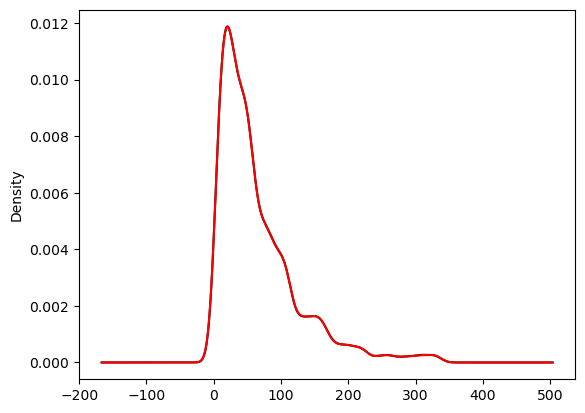

In [54]:
fig=plt.figure()
ax=fig.add_subplot(111)

d['training_hours'].plot.density(color='black')
df['training_hours'].plot.density(color='red')

<Axes: >

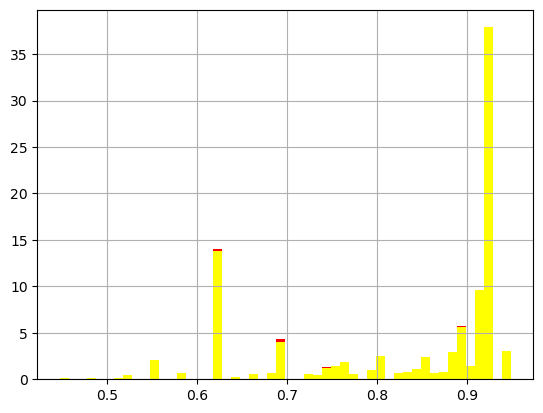

In [55]:
fig=plt.figure()
ax=fig.add_subplot(111)

d['city_development_index'].hist(bins=50,ax=ax,density=True,color='red')
df['city_development_index'].hist(bins=50,ax=ax,density=True,color='yellow')

<Axes: ylabel='Density'>

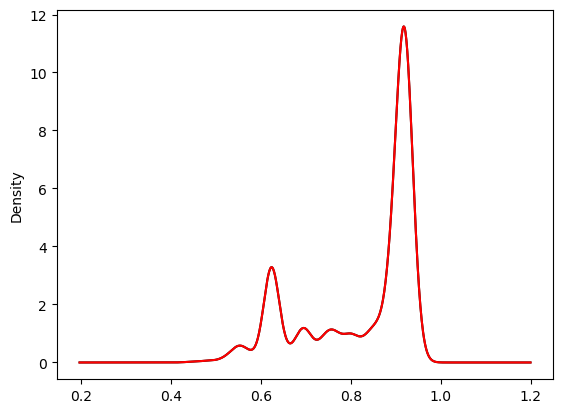

In [56]:
fig=plt.figure()
ax=fig.add_subplot(111)

d['city_development_index'].plot.density(color='black')
d['city_development_index'].plot.density(color='red')

In [57]:
temp=pd.concat([
    d['enrolled_university'].value_counts()/len(d),
    df['enrolled_university'].value_counts()/len(df)
],axis=1)

temp.columns=['original','new']

temp

,original,new
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [58]:
temp=pd.concat([
    d['education_level'].value_counts()/len(d),
    df['education_level'].value_counts()/len(df)
],axis=1)

temp.columns=['original','new']

temp

,original,new
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587
